

## 1.   Self-propelling Agents
*   Second-order system
*   Connectivity can be defined
![alt text](https://drive.google.com/uc?id=1hsHe13jrcfmonv18WXkaws_ZVwZXvoZT)





In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
import matplotlib
import time
import sys
import math
from matplotlib import animation, rc, rcParams
from IPython.display import HTML
import time
import csv
from IPython.display import display

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
########### AGENT ############
class Agent(object):
	def __init__(self, pos, vel, agent_count, coupling=0.25, delay=100000, conn_num=55, conn_arr=[], potential_field=0):
		self.pos = pos
		self.vel = vel
		self.coupling = coupling # coupling strength, constant for each agent
		self.delay = delay # time delay between agents
		self.conn_num = conn_num
		self.agent_count = agent_count
		self.info_queue = []
		self.conn_arr = np.array(np.random.randint(0,agent_count,conn_num)) # Connectivity for this agent
		self.acc = 0.0

	def update_acc(self, vel, pos_ls):
		f = (np.sum(np.tile(self.pos,(self.agent_count,1)) - pos_ls, axis=0))*self.coupling/(self.agent_count)
		#Limited connectivity
		#f = (np.sum((np.tile(self.pos,(self.conn_num,1))),axis=0)-
		#	np.sum(pos_ls[self.conn_arr],axis=0))*self.coupling/(self.conn_num) #swarm coupling term
		#print "mean field: ", np.sum(pos_ls,axis=0)*a/(agents_count)
		p = (1-np.dot(vel,vel))*vel #self-propulsion term
		n = np.random.normal() #noise term
		acc = p - f + n*0 #acceleration without delay term
		return acc


	def move_agent(self,pos_ls):
		self.acc = self.update_acc(self.vel, pos_ls)
		self.vel = self.vel + self.acc*0.001
		self.pos = self.pos + self.vel*0.001
		# adding delay to information passed to other agents
		if len(self.info_queue) > self.delay:
			self.info_queue.pop(0)
		self.info_queue.append(self.pos)


In [0]:
############### SWARM ################
class Swarm(object):
	def __init__(self, agent_ls):
		self.agent_ls = agent_ls
		self.pos_ls = np.zeros((len(agent_ls),2))
		self.n = len(agent_ls) #total number of agents
		self.it = 0
		
	def move_swarm(self, swarm_file, sampling_rate, save=0):
			pos_str = (2*len(agent_ls))*[0]
			for i in range(len(self.agent_ls)):
				agent_ls[i].move_agent(self.pos_ls)
				#self.pos_ls[i] = agent_ls[i].pos
				self.pos_ls[i] = agent_ls[i].info_queue[0]
				#pos_str[i*2] = self.pos_ls[i]
				#pos_str[i*2+1] = self.agent_ls[i].vel
				#print('pos: ',self.agent_ls[i].pos)
				#print('info: ', self.agent_ls[i].info_queue[0])
				pos_str[i*2] = self.agent_ls[i].pos
				pos_str[i*2+1] = self.agent_ls[i].vel
				
			if save==1 and self.it%sampling_rate == 0:
				swarm_writer = csv.writer(swarm_file,delimiter = ',')
				swarm_writer.writerow(pos_str)
			self.it += 1
			#print("Iteration:", self.it)

In [30]:
############ SIMULATING ############
  #for k in range(50):
  # Parameters
  SAVE = 1
  MAX_ITER = 400000 # total number of iterations to simulate
  AGENT_COUNT = 10
  SAMPLING_RATE = 1000
  SAVE_NAME = '3agent.csv'

  # square initialization
  init_pos = np.array([(np.random.random()*10, np.random.random()*10) for i in range(AGENT_COUNT)])
  init_vel = np.array([10*(0.5-np.array([np.random.random(),np.random.random()])) for i in range(AGENT_COUNT)])

  agent_ls = []
  for i in range(len(init_pos)):
    agent_ls.append(Agent(init_pos[i],init_vel[i],len(init_pos)))
  #agent_ls = [Agent(init_pos[i],init_vel[i],AGENT_COUNT) for i in range(AGENT_COUNT)]
  swarm = Swarm(agent_ls)

  # initializing animation parameters
  for i in range(MAX_ITER):
    with open(SAVE_NAME, mode='a') as swarm_file:
      swarm.move_swarm(swarm_file, SAMPLING_RATE, SAVE)
      if i%(int(MAX_ITER*0.05))==0:
        print(i/MAX_ITER*100, " percent completed")
  #print(str(k) + ' iteration done!!')

0.0  percent completed
5.0  percent completed
10.0  percent completed
15.0  percent completed
20.0  percent completed
25.0  percent completed
30.0  percent completed
35.0  percent completed
40.0  percent completed
45.0  percent completed
50.0  percent completed
55.00000000000001  percent completed
60.0  percent completed
65.0  percent completed
70.0  percent completed
75.0  percent completed
80.0  percent completed
85.0  percent completed
90.0  percent completed
95.0  percent completed


In [0]:
############## READING CSV ################
# read csv file into position and velocity lists
file_name = '/content/3agent.csv'
my_data = []
with open(file_name) as csvDataFile:
  csvReader = csv.reader(csvDataFile)
  for row in csvReader:
    my_data.append(row)
pos_from_file = []
vel_from_file =[]
pos_line = []
vel_line = []

for i in range(len(my_data)):
  for j in range(int(len(my_data[0])/2)):
    try:
      pos_line_str = my_data[i][j*2].lstrip('[').rstrip(']').split()
      vel_line_str = my_data[i][j*2+1].lstrip('[').rstrip(']').split()
    except:
      pass
    pos_line.append([float(pos_line_str[0]), float(pos_line_str[1])])
    vel_line.append([float(vel_line_str[0]), float(vel_line_str[1])])
  pos_from_file.append(pos_line)
  vel_from_file.append(vel_line)
  pos_line = []
  vel_line = []

In [32]:
############ REPLAYING FILES ############
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
AGENT_COUNT = 10
SAVE = 0

print("Number of time steps: ", len(pos_from_file))
anim_lst = pos_from_file
anim_lst = np.array(anim_lst)

fig = plt.figure()
fig.set_size_inches(8, 8)

blue_dot = mlines.Line2D([], [], color='0.3', marker='.', linestyle='None',
                          markersize=10, label='Agents')
red_dot = mlines.Line2D([], [], color='red', marker='+', linestyle='None',
                          markersize=10, label='Mean Field')
plt.legend(handles=[blue_dot, red_dot])
x = anim_lst[:,:,0]
y = anim_lst[:,:,1]
mean_x = np.sum(x,axis=1)/AGENT_COUNT
mean_y = np.sum(y,axis=1)/AGENT_COUNT

ax = plt.axes(xlim=(np.amin(x),np.amax(x)),ylim=(np.amin(y),np.amax(y)))

d, = ax.plot(x[0],y[0], c='0.3',marker='.',linestyle='None')
e, = ax.plot(mean_x[0],mean_y[0], c='red',marker='+',linestyle='None')

# embedding animation, problem is that embedding size is limited
anim_lst = anim_lst.tolist()
def animate(i):
  plt.legend(handles=[blue_dot, red_dot])
  d.set_data(x[i],y[i])
  e.set_data(mean_x[i],mean_y[i])


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=400, interval=20)
if SAVE:
  anim.save('training_1000steps.mp4',writer=animation.FFMpegWriter(fps=10))
rc('animation', html='jshtml')
anim


Output hidden; open in https://colab.research.google.com to view.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Setting Up Data

In [0]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
MAX_ITER = 800
NO_AGENT = 32
pos_input = np.array(pos_from_file[200:1000])
vel_input = np.array(vel_from_file[200:1000])
input_size = NO_AGENT*4
train_fraction = 0.9
pos_train_data = np.reshape(pos_input[0:int(MAX_ITER*train_fraction)],[int(MAX_ITER*train_fraction),NO_AGENT*2])
pos_test_data = np.reshape(pos_input[int(MAX_ITER*train_fraction):MAX_ITER],[int(MAX_ITER*(1-train_fraction))+1,NO_AGENT*2])
vel_train_data = np.reshape(vel_input[0:int(MAX_ITER*train_fraction)],[int(MAX_ITER*train_fraction),NO_AGENT*2])
vel_test_data = np.reshape(vel_input[int(MAX_ITER*train_fraction):MAX_ITER],[int(MAX_ITER*(1-train_fraction))+1,NO_AGENT*2])
train_data = np.concatenate((pos_train_data, vel_train_data),axis=1)
test_data = pos_test_data

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data)
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1,input_size)
print("train data size: ",train_data_normalized.size())

train data size:  torch.Size([720, 128])


In [0]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

train_window = 10
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)
# this sequence looks like, a list of tuples, which consist of data(list of data of window size) and label(next prediction)
print("train seq shape: ", len(train_inout_seq), ", 2, ", train_inout_seq[0][1].size())

train seq shape:  710 , 2,  torch.Size([1, 128])


# LSTM

In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size=64, hidden_layer_size=200, output_size=64):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=2)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
model = LSTM(input_size, 200, input_size,1)
model.to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [0]:
########## Training LSTM ##########
epochs = 50
model.to(device)
CHECKPOINT_PATH = "/content/drive/My Drive/Sp2020/CS522/Final Project/Codes/LSTM_2pt"
for i in range(epochs):
    for seq, labels in train_inout_seq:
        seq.to(device)
        labels.to(device)
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(2, 1, model.hidden_layer_size),
                        torch.zeros(2, 1, model.hidden_layer_size))
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%5 == 0:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
        if i%25 == 0:
          torch.save({'lstm': model,
                        }, CHECKPOINT_PATH+".pth")
print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [0]:
########## Predicting with LSTM ##########

fut_pred = 200
test_inputs = train_data_normalized[-train_window:].tolist()


model.eval()
for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).detach().numpy())
test_inputs[fut_pred:]
actual_predictions = scaler.inverse_transform(test_inputs)
# discarding velocity information
actual_predictions = actual_predictions[:,0:4]
actual_predictions = np.reshape(actual_predictions, [fut_pred+train_window,2,2])
actual_predictions = actual_predictions[0:200]
print(actual_predictions.shape)


# RNN

In [0]:
class fcRNN(nn.Module):
  def __init__(self, input_size, hidden_dim, output_size, n_layers):
    super(fcRNN, self).__init__()
    # Write your code here
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers
    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, nonlinearity='relu')
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self, x):
    x = x.view(len(x) ,1, -1)
    #print(x.size())
    #print(self.hidden.size())
    h0 = torch.zeros(self.n_layers, 1, self.hidden_dim).requires_grad_().to(device)
    out, hidden = self.rnn(x, h0.detach())
    out = out.view(-1, self.hidden_dim)
    out = self.fc(out)
    return out[-1]

In [0]:
LOAD_CHECKPOINT_PATH = '/content/drive/My Drive/Sp2020/CS522/Final Project/Codes/RNN.pth'
checkpoint = torch.load(LOAD_CHECKPOINT_PATH)
model = checkpoint['lstm']
#model = fcRNN(input_size, 200, input_size,1)
model.to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [0]:
########## Training RNN ##########

epochs = 100
CHECKPOINT_PATH = "/content/drive/My Drive/Sp2020/CS522/Final Project/Codes/RNN"
for i in range(epochs):
    running_loss = 0
    for seq, labels in train_inout_seq:
        seq.to(device)
        labels.to(device)
        optimizer.zero_grad()
        y_pred = model(seq)
        single_loss = loss_function(y_pred.view(1,len(y_pred)), labels)
        single_loss.backward()
        optimizer.step()
        running_loss += single_loss.item()
    if i%5 == 0:
        print(f'epoch: {i:3} loss: {running_loss:10.8f}')
        if i%25 == 0:
          torch.save({'lstm': model,
                        }, CHECKPOINT_PATH+".pth")
print(f'epoch: {i:3} loss: {running_loss:10.10f}')
torch.save({'lstm': model,
            }, CHECKPOINT_PATH+".pth")

epoch:   0 loss: 3.70143732


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type fcRNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


epoch:   5 loss: 3.56288002
epoch:  10 loss: 3.42870068
epoch:  15 loss: 3.29817774
epoch:  20 loss: 3.17154200
epoch:  25 loss: 3.04895797
epoch:  30 loss: 2.93059445
epoch:  35 loss: 2.81789501
epoch:  40 loss: 2.71126850
epoch:  45 loss: 2.61104298
epoch:  50 loss: 2.51746239
epoch:  55 loss: 2.42986828
epoch:  60 loss: 2.34827195
epoch:  65 loss: 2.27238830
epoch:  70 loss: 2.20185981
epoch:  75 loss: 2.13637918
epoch:  80 loss: 2.07549936
epoch:  85 loss: 2.01910765
epoch:  90 loss: 1.96681482
epoch:  95 loss: 1.91816339
epoch:  99 loss: 1.8817735733


In [0]:
########## Predicting with RNN ##########

fut_pred = 80
test_inputs = train_data_normalized[-train_window:].tolist()
model.eval()
for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        test_inputs.append(model(seq).detach().numpy())

# only keeps predicted values
test_inputs = test_inputs[-fut_pred:]
actual_predictions = scaler.inverse_transform(test_inputs)

# discarding velocity information
actual_predictions = actual_predictions[:,0:int(input_size/2)]
actual_predictions = np.reshape(actual_predictions, [fut_pred,int(input_size/4),2])
anim_lst = actual_predictions

print('last step: ', np.reshape(pos_train_data[len(pos_train_data)-1], [32,2])[0])
print('prediction: ', actual_predictions[0][0])
print('ground truth: ', np.reshape(pos_test_data[0], [32,2])[0])

last step:  [5.30267096 3.95669359]
prediction:  [5.18215283 3.79286796]
ground truth:  [5.2414187  3.87618015]


Predicted number of time steps:  80


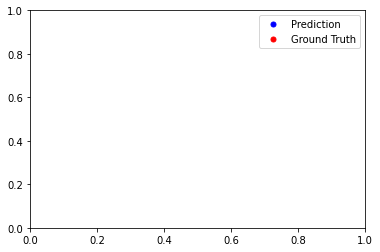

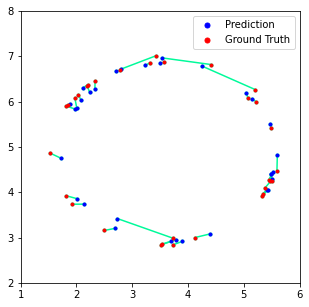

In [0]:
############ REPLAYING FILES ############
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='Prediction')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='Ground Truth')
plt.legend(handles=[blue_dot, red_dot])
pred_len = len(anim_lst)
print("Predicted number of time steps: ", pred_len)
ground_truth = np.reshape(pos_test_data, [pred_len, 32,2])

fig = plt.figure()
fig.set_size_inches(5, 5)
ax = plt.axes(xlim=(1,6),ylim=(2,8))
anim_lst = np.array(anim_lst)
x = anim_lst[:,:,0]
y = anim_lst[:,:,1]
x_gt = ground_truth[:,:,0]
y_gt = ground_truth[:,:,1]

g = [Line2D([x_gt[0][0], x[0][0]],[y_gt[0][0], y[0][0]]) for i in range(32)]
for j in range(32):
  g[j], = ax.plot([x_gt[0][j], x[0][j]],[y_gt[0][j], y[0][j]], c='mediumspringgreen',marker='.')
d, = ax.plot(x[0],y[0], c='blue',marker='.',linestyle='None')
e, = ax.plot(x_gt[0],y_gt[0], c='red',marker='.',linestyle='None')


'''
# dynamically plotting
out=display(fig, display_id=True)
anim_len = len(anim_lst)
for i in range(anim_len):
  d.set_data(x[i],y[i])
  out.update(fig)
  time.sleep(0.005)

'''
# embedding animation, problem is that embedding size is limited
anim_lst = anim_lst.tolist()
def animate(i):
    plt.legend(handles=[blue_dot, red_dot])
    dots = anim_lst[i][:]
    # plotting a line between every pair of points
    for j in range(32):
      g[j].set_data([x_gt[i][j], x[i][j]],[y_gt[i][j], y[i][j]])
    
    d.set_data([dot[0] for dot in dots],[dot[1] for dot in dots])
    dots_gt = ground_truth[i][:]
    e.set_data([dot[0] for dot in dots_gt],[dot[1] for dot in dots_gt])
    return d, e

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=80, interval=20, blit=True)
anim.save('compare_80steps.mp4',writer=animation.FFMpegWriter(fps=10))
rc('animation', html='jshtml')
anim


(80, 32)


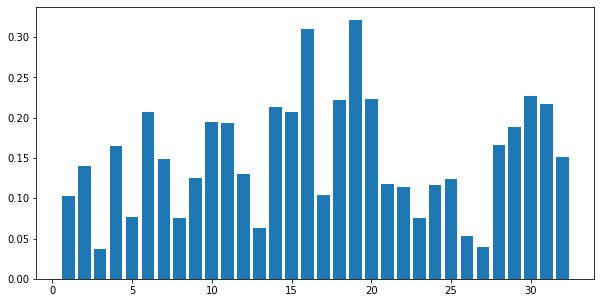

In [0]:
############ Animate Errors #############

# Calculating euclidean distances between each point
diff = np.abs(actual_predictions - np.reshape(pos_test_data, [len(pos_test_data),AGENT_COUNT,2]))
diff = np.sqrt(np.power(diff[:,:,0],2)+np.power(diff[:,:,1],2))
print(diff.shape)

def barlist(n): 
    return [1/float(n*k) for k in range(1,6)]

fig=plt.figure()
fig.set_size_inches(10, 5)
n = 80 #Number of frames
x=range(1,33)
barcollection = plt.bar(x ,diff[0])

def animate(a):
    y=diff[a]
    for i, b in enumerate(barcollection):
        b.set_height(y[i])


anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                            interval=100)


anim.save('error_barplot.mp4',writer=animation.FFMpegWriter(fps=10))
rc('animation', html='jshtml')
anim

In [0]:
a = [1,2,3,4,5,6,7,8]
a[-2:]

[7, 8]

In [0]:
a = -0.25
A = np.array([[0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1],
              [a,1,1,1,0,0],
              [1,a,1,0,1,0],
              [1,1,a,0,0,1]])
det = np.linalg.det(A)
eig = np.linalg.eig(A)
print(eig[0].real)

[-0.91421356  0.5         0.5         1.91421356  0.5         0.5       ]
